In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 
import time

In [2]:
data = pd.read_csv("../Data/ratings.csv")
pivot_table = data.pivot_table(index = ["userId"],columns = ["movieId"],values = "rating")
#pivot_table = pivot_table.dropna(how='all', axis=1)
#pivot_table.head(10)
pivot_table.head(10)

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,4.0,5.0,3.0,5.0,4.0,4.0,3.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Train test split

In [3]:
def train_test_split(data, seed = 6, portion = 0.8):
    train_set = {}
    test_set = {}
    for user, movies in data.groupby('userId'):
        movies = movies.sample(frac=1, random_state=seed).reset_index(drop=True)
        train = movies[:int(portion*len(movies))]
        test = movies[int(portion*len(movies)):]
        train_set[user] = train[['movieId', 'rating']]
        test_set[user] = test[['movieId', 'rating']]
    #print('Data preparation finished')
    return train_set, test_set

In [4]:
train_set, test_set =  train_test_split(data)
#print(train_set)
#print(test_set)
#train=np.zeros((len()))

## reunion the element to matrix

In [5]:
train = pd.DataFrame()
for user in train_set:
    train_set[user]['userId'] = user
    train = pd.concat([train, train_set[user].pivot_table(index = ["userId"],columns = ["movieId"],values = "rating")], axis= 0)

In [6]:
#test = pd.DataFrame(columns=list(pivot_table.columns.values))
#test.index.name = 'userId'
#test.columns.name = 'movieId'
test_ = pd.DataFrame()
for user in test_set:
    test_set[user]['userId'] = user
    test_ = pd.concat([test_, test_set[user].pivot_table(index = ["userId"],columns = ["movieId"],values = "rating")], axis= 0)

In [7]:
#pivot_table = pivot_table.dropna(how='all', axis=1)
#pivot_table.head(10)
# format columns in test as in train 
test = test_.drop(columns = list(set(test_.columns.values)-set(train.columns.values)))
test = test.join(pd.DataFrame(columns=list(set(train.columns.values)-set(test_.columns.values))))
#test = test.reindex(sorted(test.columns), axis=1)
test.columns.name = 'movieId'
test.head()

movieId,2,3,4,5,6,7,8,9,10,11,...,57326,40946,81910,8183,114678,40955,8188,8189,8190,8191
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
train.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,191005,193565,193567,193571,193573,193579,193581,193583,193585,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:44: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


原始的评分矩阵R为：
 [[4.  nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [2.5 2.  2.  ... nan nan nan]
 [3.  nan nan ... nan nan nan]
 [5.  nan nan ... nan nan nan]]
经过MF算法填充0处评分值后的评分矩阵R_MF为：
 [[1.59202744 1.38481812 0.93866283 ... 0.73818584 0.88560909 0.19405659]
 [1.55622845 1.34524253 0.87753717 ... 0.68164563 0.87043533 0.19735341]
 [0.97483718 0.88080969 0.730608   ... 0.60754948 0.52381965 0.08899386]
 ...
 [3.42646715 2.97367885 1.98790636 ... 1.55648906 1.90989825 0.42385326]
 [0.86164226 0.73505645 0.43952928 ... 0.33115902 0.48742607 0.11813981]
 [4.35133965 3.757322   2.43429041 ... 1.88659942 2.43610201 0.5555246 ]]
RMSE


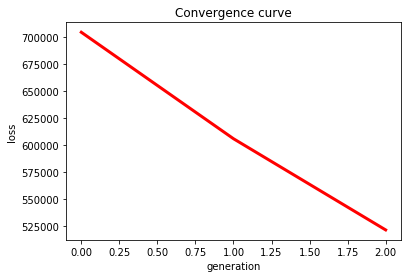

In [9]:
# !/usr/bin/env python
# encoding: utf-8
# from pylab import *
import numpy


def matrix_factorization(R, P, Q, K, steps=3, alpha=0.0002, beta=0.02):
    Q = Q.T  # .T操作表示矩阵的转置
    result = []
    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:  # 学习LFM模型时的迭代过程
                    # .dot(P,Q) 表示矩阵内积
                    eij = R[i][j]-numpy.dot(P[i, :], Q[:, j])
                    for k in range(K):
                        P[i][k] = P[i][k]+alpha*(2*eij*Q[k][j]-beta*P[i][k])
                        Q[k][j] = Q[k][j]+alpha*(2*eij*P[i][k]-beta*Q[k][j])
        eR = numpy.dot(P, Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e+pow(R[i][j]-numpy.dot(P[i, :], Q[:, j]), 2)
                    for k in range(K):
                        e = e+(beta/2)*(pow(P[i][k], 2)+pow(Q[k][j], 2))
        result.append(e)
        if e < 0.001:
            break
    return P, Q.T, result


if __name__ == '__main__':
    start = time.clock()
    R = numpy.array(train)
    N = len(R)
    M = len(R[0])
    K = 2

    P = numpy.random.rand(N, K)  # 随机生成一个 N行 K列的矩阵
    Q = numpy.random.rand(M, K)  # 随机生成一个 M行 K列的矩阵

    nP, nQ, result = matrix_factorization(R, P, Q, K)
    end = time.clock()
    exe_time = end-start
    print("原始的评分矩阵R为：\n", R)
    R_MF = numpy.dot(nP, nQ.T)
    print("经过MF算法填充0处评分值后的评分矩阵R_MF为：\n", R_MF)
    print("RMSE")

 # -------------损失函数的收敛曲线图---------------

    n = len(result)
    x = range(n)
    plt.plot(x, result, color='r', linewidth=3)
    plt.title("Convergence curve")
    plt.xlabel("generation")
    plt.ylabel("loss")
    plt.show()

In [10]:
T = numpy.array(test)
print("execution time:",exe_time)
mse_train = ((R_MF[~np.isnan(R)]-R[~np.isnan(R)]) ** 2).mean(axis=None)
print("mse_train:", math.sqrt(mse_train))
mse_test = ((R_MF[~np.isnan(T)]- T[~np.isnan(T)]) ** 2).mean(axis=None)
print("mse_test:",math.sqrt(mse_test))

execution time: 28.20254399999999
mse_train: 2.53822975340016


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''